In [1]:
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install matplotlib

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------  8.7/8.7 MB 46.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 34.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ---------------- ----------------------- 16.3/38.5 MB 80.3 MB/s eta 0:00:01
   ---------------------------------- ----- 33.0/38.5 MB 80.0 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 63.8 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -------

## Load the data

In [3]:
import pandas as pd

In [7]:
df=pd.read_csv('clt_housing_cleaned.csv')

In [6]:
import os
print(os.getcwd())

C:\Users\admin


In [8]:
df.head()

,TEN,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,Rented,5,3.0,"Other family household: Female householder, no...",1.0,100.0,1.0,18000.0,800.0,Charlotte City (Northwest),1.0,5
1,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,120.0,1.0,72000.0,1100.0,Charlotte City (South),0.0,7
2,Rented,2,0.0,Married couple household,1.0,170.0,2.0,56600.0,600.0,Charlotte City (Central),0.0,5
3,Rented,4,2.0,Married couple household,1.0,80.0,2.0,59400.0,800.0,Charlotte City (Southwest),0.0,6
4,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,30.0,1.0,160000.0,1400.0,Charlotte City (Central),0.0,1


In [9]:
df.shape

(1418, 12)

In [11]:
df.dtypes

TEN              object
NP                int64
NOC             float64
HHT              object
LNGI            float64
ELEP            float64
VEH             float64
HINCP           float64
RNTP            float64
PUMA             object
COST_BURDALL    float64
RMSP              int64
dtype: object

In [12]:
df.describe()

,NP,NOC,LNGI,ELEP,VEH,HINCP,RNTP,COST_BURDALL,RMSP
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,2.158674,0.474612,1.070522,113.585331,1.399859,63398.102962,1069.107193,0.453456,4.379408
std,1.298525,0.936060,0.256115,65.377187,0.801498,57072.247797,441.783951,0.498005,1.806418
min,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,70.000000,1.000000,27900.000000,800.000000,0.000000,3.000000
50%,2.000000,0.000000,1.000000,100.000000,1.000000,50000.000000,1000.000000,0.000000,4.000000
75%,3.000000,1.000000,1.000000,140.000000,2.000000,83800.000000,1300.000000,1.000000,5.000000
max,11.000000,6.000000,2.000000,560.000000,5.000000,523000.000000,2800.000000,1.000000,12.000000


## Data pre-processing/cleaning

In [14]:
df.head()

,TEN,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,Rented,5,3.0,"Other family household: Female householder, no...",1.0,100.0,1.0,18000.0,800.0,Charlotte City (Northwest),1.0,5
1,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,120.0,1.0,72000.0,1100.0,Charlotte City (South),0.0,7
2,Rented,2,0.0,Married couple household,1.0,170.0,2.0,56600.0,600.0,Charlotte City (Central),0.0,5
3,Rented,4,2.0,Married couple household,1.0,80.0,2.0,59400.0,800.0,Charlotte City (Southwest),0.0,6
4,Rented,1,0.0,Nonfamily household: Male householder: Living ...,1.0,30.0,1.0,160000.0,1400.0,Charlotte City (Central),0.0,1


In [15]:
for col in df.columns:
    print(f"{col}:\n {df[col].value_counts()}\n")

TEN:
 TEN
Rented    1418
Name: count, dtype: int64

NP:
 NP
1     550
2     444
3     199
4     140
5      61
6      15
7       5
8       2
9       1
11      1
Name: count, dtype: int64

NOC:
 NOC
0.0    1048
1.0     167
2.0     132
3.0      51
4.0      14
5.0       3
6.0       3
Name: count, dtype: int64

HHT:
 HHT
Married couple household                                         342
Nonfamily household: Female householder: Living alone            302
Other family household: Female householder, no spouse present    252
Nonfamily household: Male householder: Living alone              248
Nonfamily household: Male householder: Not living alone          108
Nonfamily household: Female householder: Not living alone         93
Other family household: Male householder, no spouse present       73
Name: count, dtype: int64

LNGI:
 LNGI
1.0    1318
2.0     100
Name: count, dtype: int64

ELEP:
 ELEP
100.0    168
80.0     143
70.0     117
60.0     108
90.0     104
50.0     103
120.0     90
150.0 

In [16]:
df.shape

(1418, 12)

In [17]:
df.drop(columns=['TEN'],inplace=True)

In [18]:
df.shape

(1418, 11)

In [19]:
import seaborn as sns

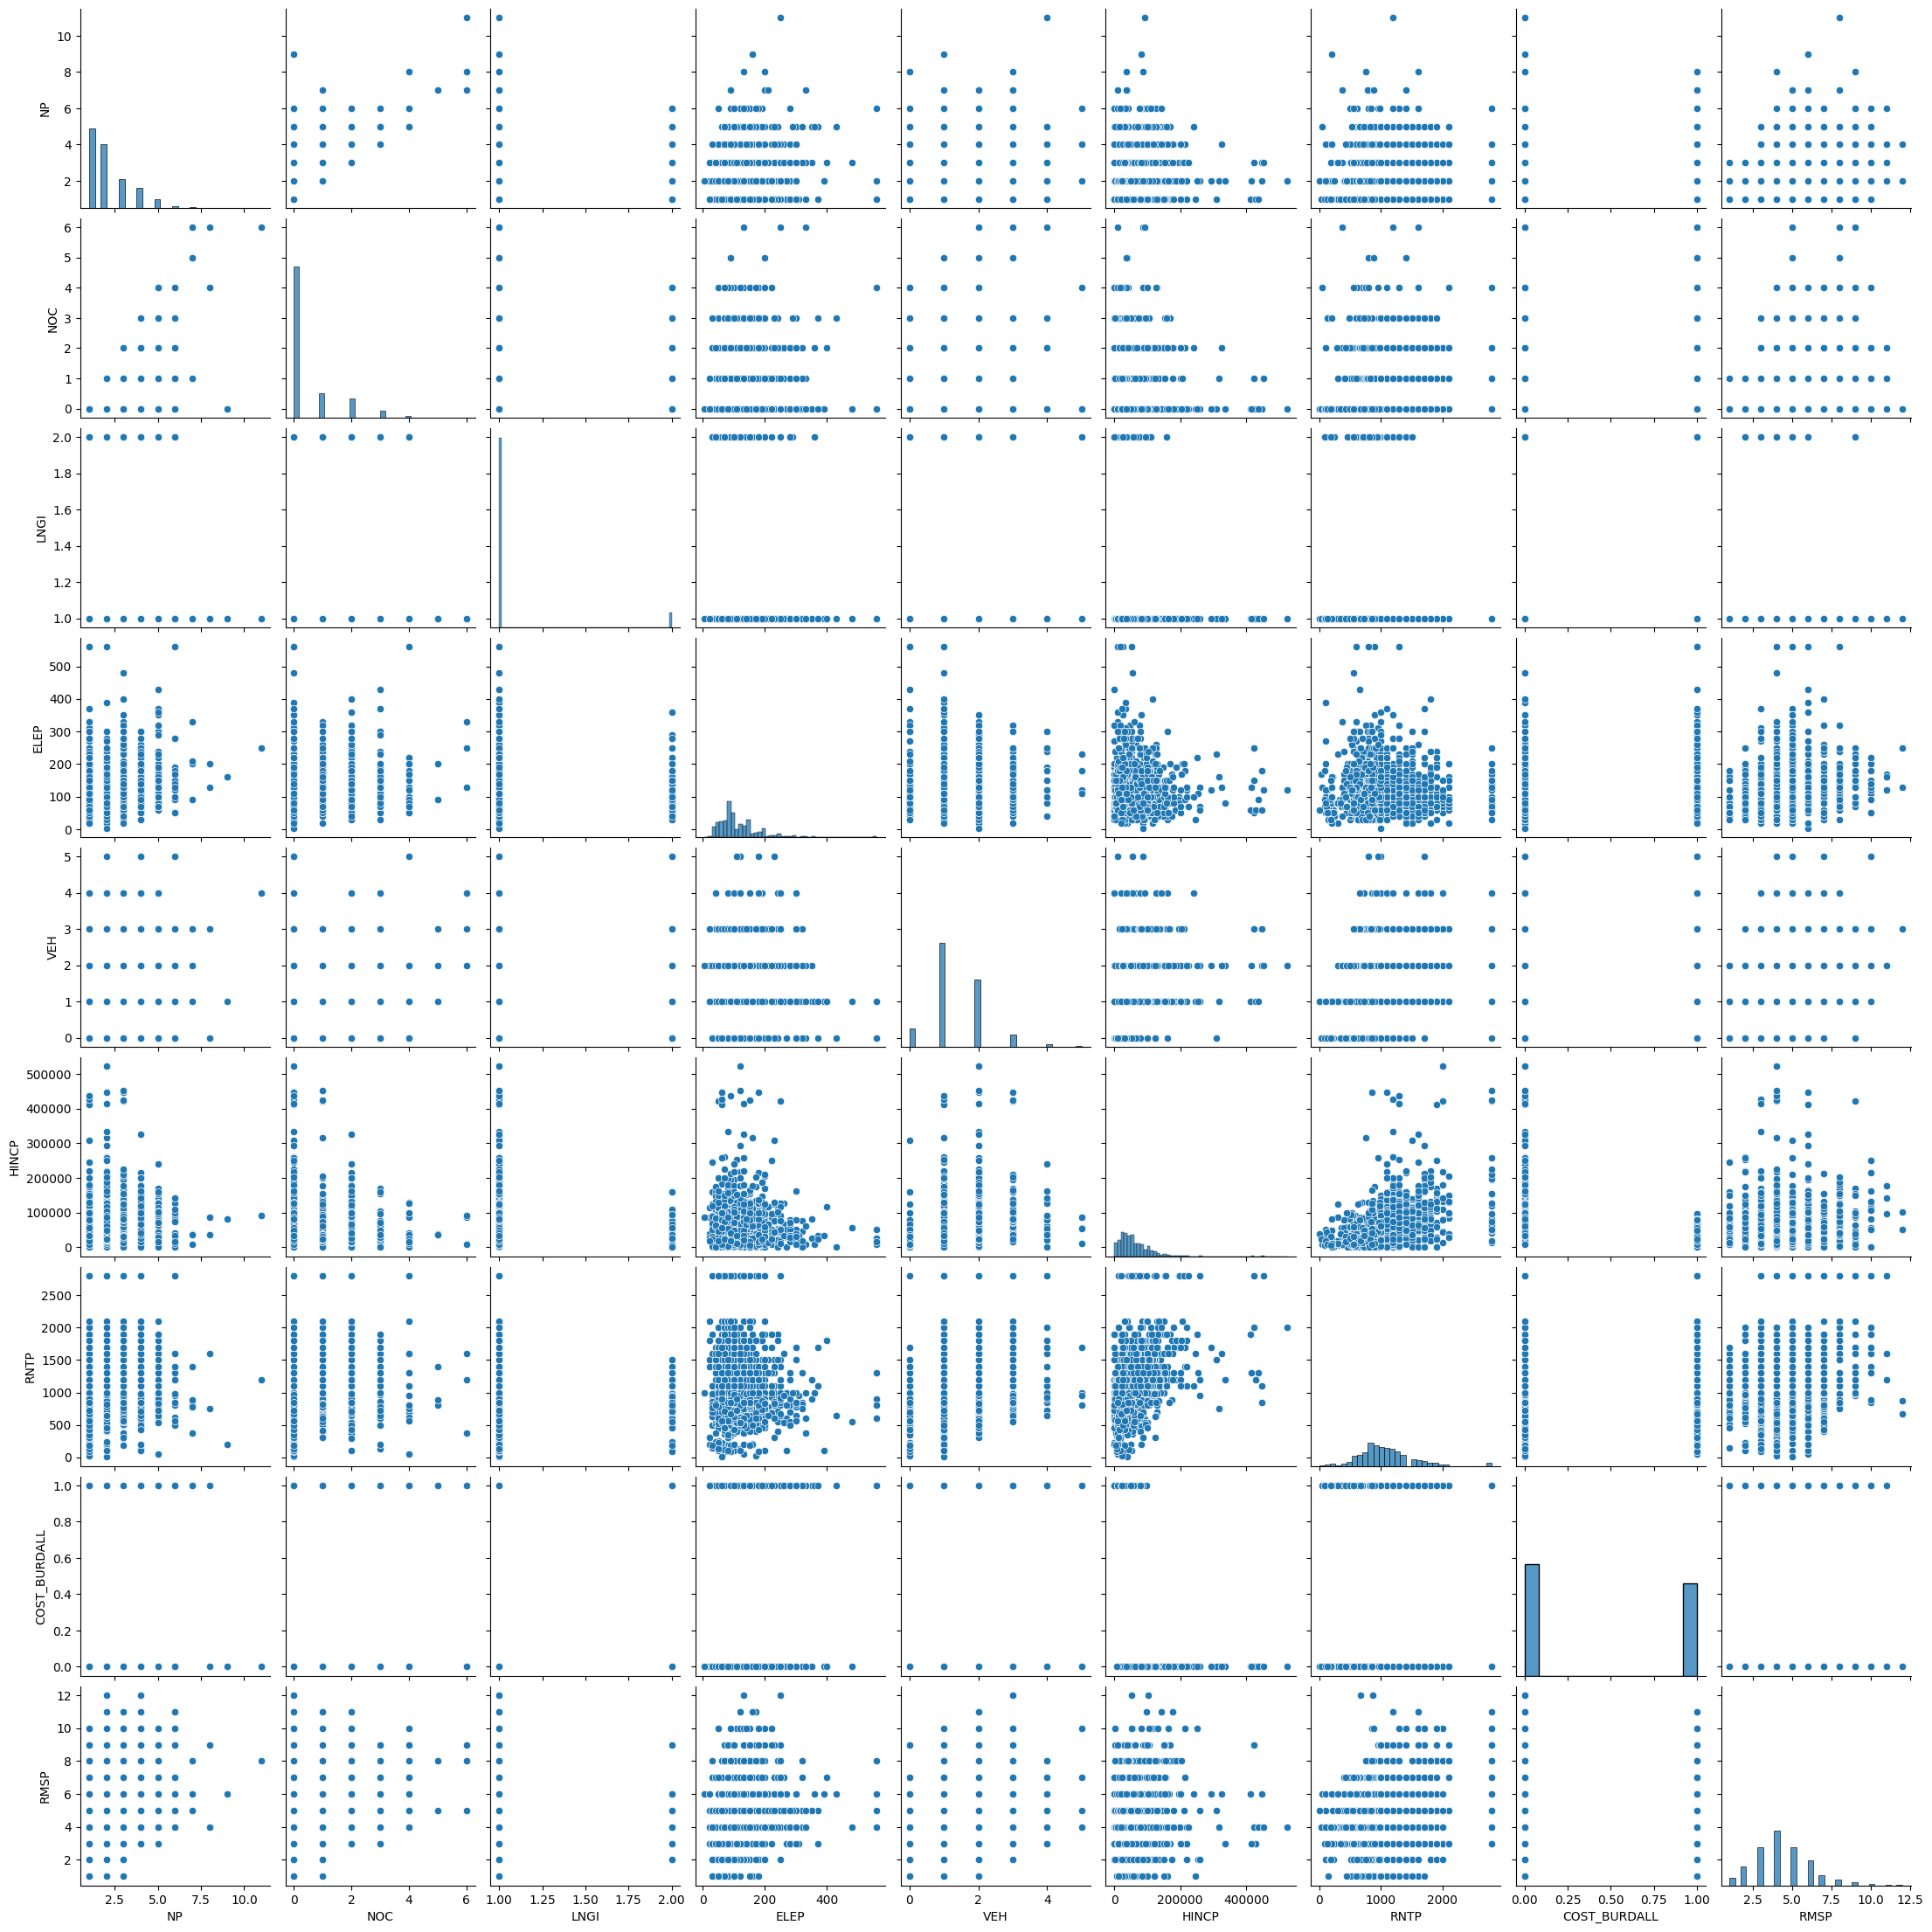

In [20]:
sns.pairplot(data=df)

In [21]:
df.head()

,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,5,3.0,"Other family household: Female householder, no...",1.0,100.0,1.0,18000.0,800.0,Charlotte City (Northwest),1.0,5
1,1,0.0,Nonfamily household: Male householder: Living ...,1.0,120.0,1.0,72000.0,1100.0,Charlotte City (South),0.0,7
2,2,0.0,Married couple household,1.0,170.0,2.0,56600.0,600.0,Charlotte City (Central),0.0,5
3,4,2.0,Married couple household,1.0,80.0,2.0,59400.0,800.0,Charlotte City (Southwest),0.0,6
4,1,0.0,Nonfamily household: Male householder: Living ...,1.0,30.0,1.0,160000.0,1400.0,Charlotte City (Central),0.0,1


In [22]:
df['HINCP'] = df['HINCP']/12

In [23]:
df.head()

,NP,NOC,HHT,LNGI,ELEP,VEH,HINCP,RNTP,PUMA,COST_BURDALL,RMSP
0,5,3.0,"Other family household: Female householder, no...",1.0,100.0,1.0,1500.000000,800.0,Charlotte City (Northwest),1.0,5
1,1,0.0,Nonfamily household: Male householder: Living ...,1.0,120.0,1.0,6000.000000,1100.0,Charlotte City (South),0.0,7
2,2,0.0,Married couple household,1.0,170.0,2.0,4716.666667,600.0,Charlotte City (Central),0.0,5
3,4,2.0,Married couple household,1.0,80.0,2.0,4950.000000,800.0,Charlotte City (Southwest),0.0,6
4,1,0.0,Nonfamily household: Male householder: Living ...,1.0,30.0,1.0,13333.333333,1400.0,Charlotte City (Central),0.0,1


In [24]:
df = pd.get_dummies(df, columns = ['HHT','PUMA'],drop_first=True)

In [25]:
df.head()

,NP,NOC,LNGI,ELEP,VEH,HINCP,RNTP,COST_BURDALL,RMSP,HHT_Nonfamily household: Female householder: Living alone,...,HHT_Nonfamily household: Male householder: Not living alone,"HHT_Other family household: Female householder, no spouse present","HHT_Other family household: Male householder, no spouse present",PUMA_Charlotte City (Northeast),PUMA_Charlotte City (Northwest),PUMA_Charlotte City (South),PUMA_Charlotte City (Southwest),PUMA_Mecklenburg County (East)--Mint Hill & Matthews (North) Towns,"PUMA_Mecklenburg County (North)--Huntersville, Cornelius & Davidson Towns",PUMA_Mecklenburg County (South)--Matthews Town (South)
0,5,3.0,1.0,100.0,1.0,1500.000000,800.0,1.0,5,False,...,False,True,False,False,True,False,False,False,False,False
1,1,0.0,1.0,120.0,1.0,6000.000000,1100.0,0.0,7,False,...,False,False,False,False,False,True,False,False,False,False
2,2,0.0,1.0,170.0,2.0,4716.666667,600.0,0.0,5,False,...,False,False,False,False,False,False,False,False,False,False
3,4,2.0,1.0,80.0,2.0,4950.000000,800.0,0.0,6,False,...,False,False,False,False,False,False,True,False,False,False
4,1,0.0,1.0,30.0,1.0,13333.333333,1400.0,0.0,1,False,...,False,False,False,False,False,False,False,False,False,False


## Modeling

In [27]:
X = df.drop(columns=['COST_BURDALL'])
y = df['COST_BURDALL']

In [28]:
X.shape

(1418, 21)

In [29]:
y.shape

(1418,)

In [30]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (1134, 21)
X_test (284, 21)
y_train (1134,)
y_test (284,)


### Train the model

In [35]:
from sklearn import tree

In [37]:
clf = tree.DecisionTreeClassifier()

In [38]:
clf = clf.fit(X_train,y_train)

In [39]:
predicted = clf.predict(X_test)

In [40]:
predicted

array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1.

In [41]:
y_test

932     1.0
1384    0.0
445     0.0
1115    1.0
774     0.0
       ... 
572     0.0
917     1.0
1048    0.0
1046    0.0
854     1.0
Name: COST_BURDALL, Length: 284, dtype: float64

In [42]:
clf.score(X_test, y_test)

0.9295774647887324

In [43]:
import matplotlib.pyplot as plt

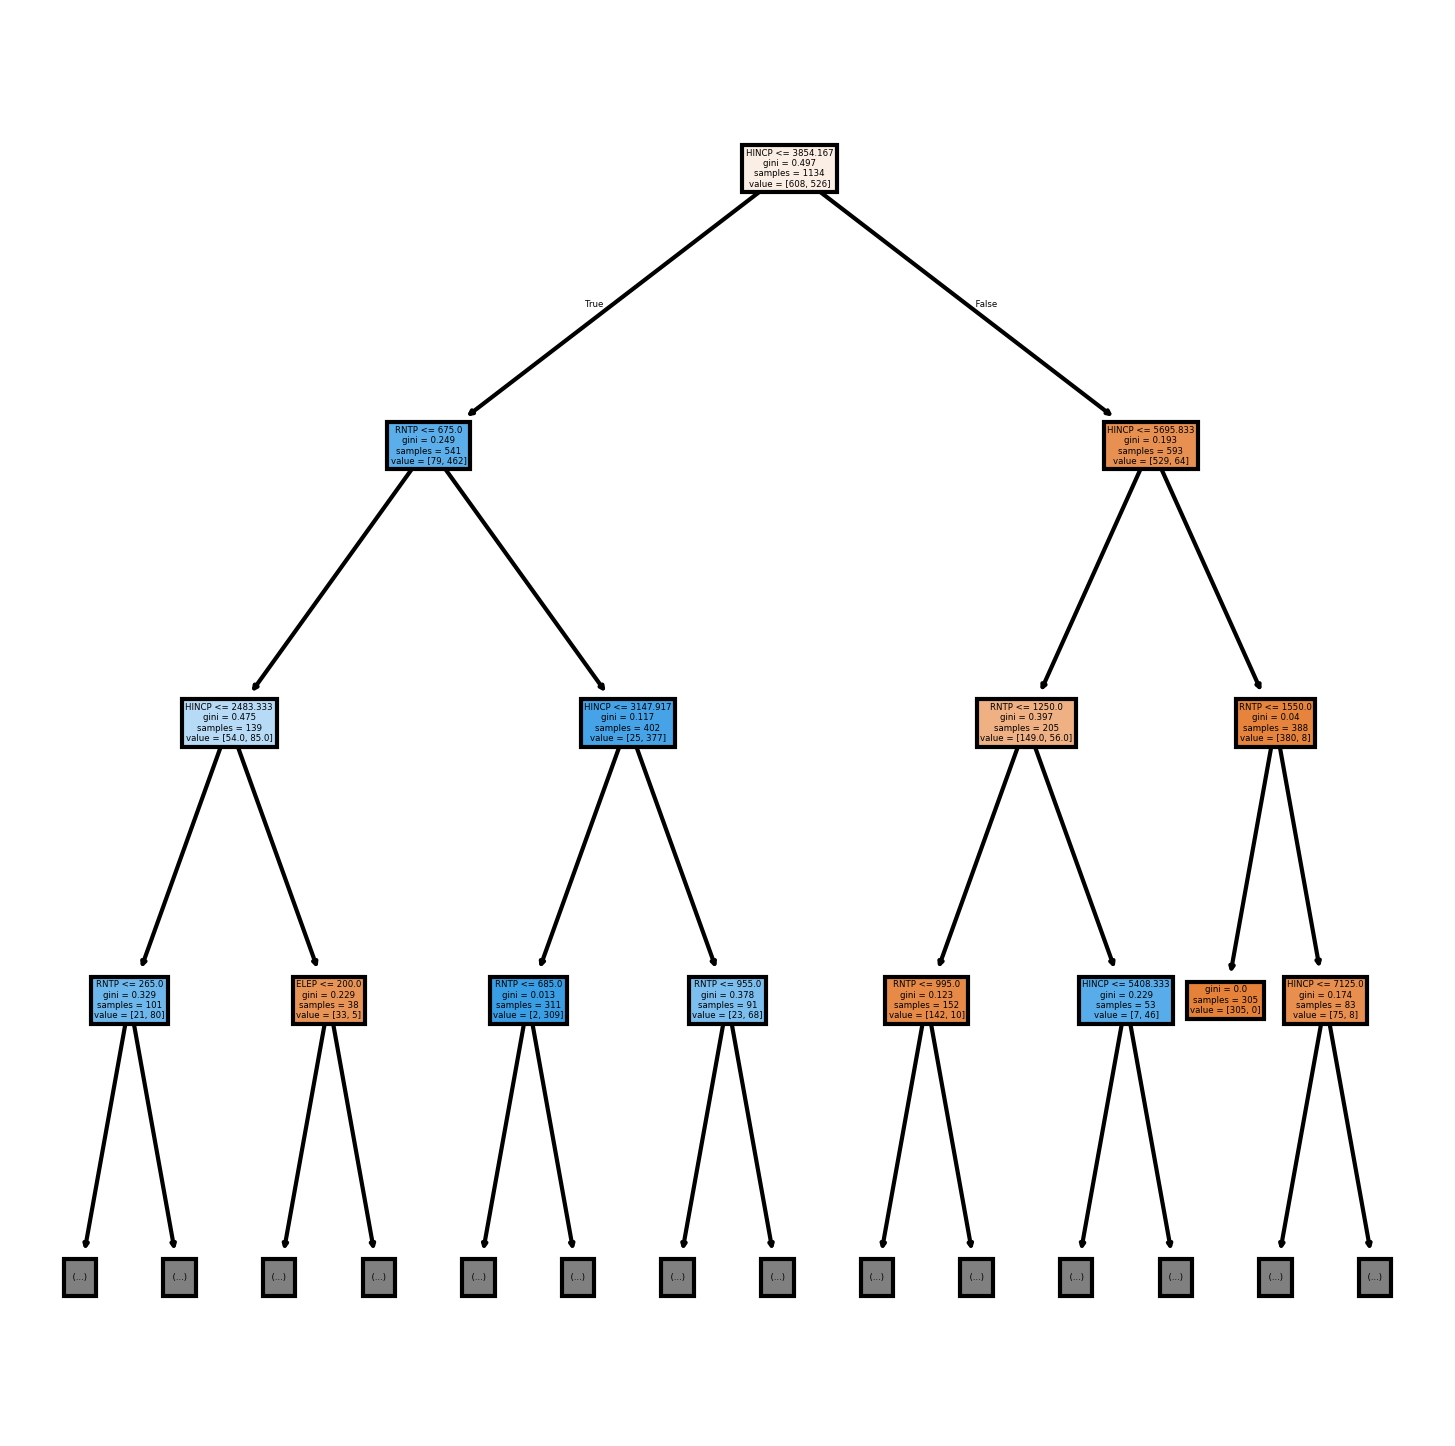

In [44]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(6,6),dpi=300)
tree.plot_tree(clf, max_depth=3, feature_names=X.columns,filled=True)
plt.show()

In [46]:
fi = clf.feature_importances_
fi = pd.Series(data=fi,index=X.columns)
fi.sort_values(ascending=False,inplace=True)
fi

HINCP                                                                        0.715215
RNTP                                                                         0.214210
ELEP                                                                         0.048471
RMSP                                                                         0.008454
HHT_Nonfamily household: Female householder: Not living alone                0.003152
PUMA_Mecklenburg County (East)--Mint Hill & Matthews (North) Towns           0.002837
PUMA_Charlotte City (Northwest)                                              0.002702
VEH                                                                          0.002364
HHT_Nonfamily household: Male householder: Not living alone                  0.001622
HHT_Other family household: Female householder, no spouse present            0.000973
NOC                                                                          0.000000
NP                                                    

C:\Users\admin\AppData\Local\Temp\ipykernel_14680\2887251581.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')


[Text(0.0, 0, '0.0'),
 Text(0.1, 0, '0.1'),
 Text(0.2, 0, '0.2'),
 Text(0.30000000000000004, 0, '0.3'),
 Text(0.4, 0, '0.4'),
 Text(0.5, 0, '0.5'),
 Text(0.6000000000000001, 0, '0.6'),
 Text(0.7000000000000001, 0, '0.7'),
 Text(0.8, 0, '0.8')]

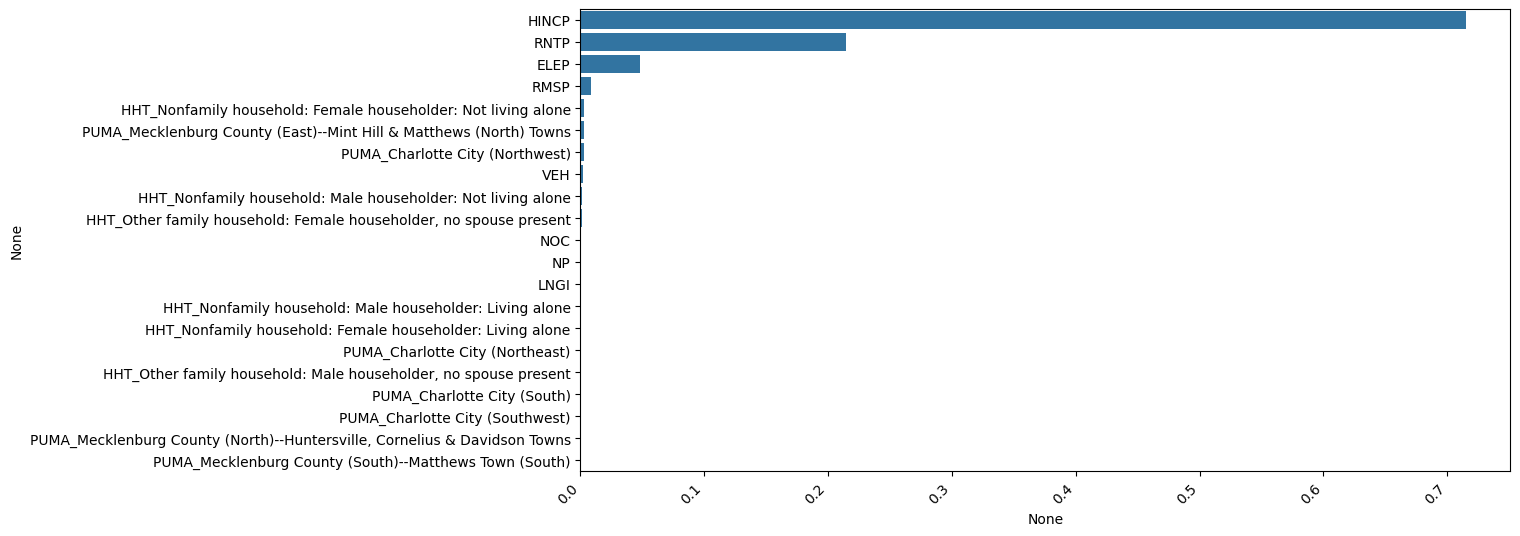

In [47]:
plt.figure(figsize=(12,6))
chart=sns.barplot(x=fi,y=fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45,horizontalalignment='right')

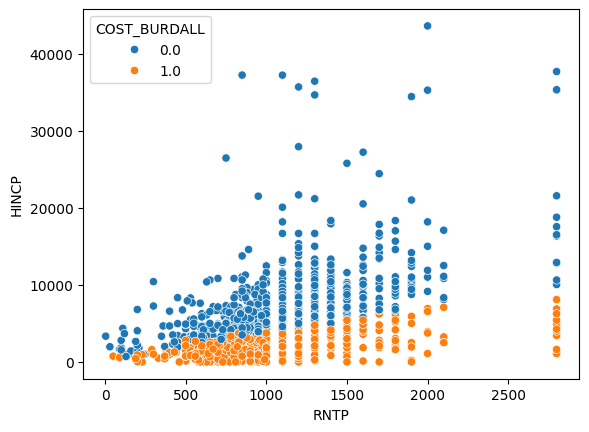

In [48]:
sns.scatterplot(data=df,x='RNTP',y='HINCP',hue="COST_BURDALL")
plt.show()

## Modeling-Part2

In [49]:
from sklearn.model_selection import cross_validate
from sklearn import metrics
import numpy as np


In [52]:
X = df.drop(columns=['COST_BURDALL','RNTP','HINCP'])
y = df['COST_BURDALL']

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [54]:
clf2=tree.DecisionTreeClassifier()
clf2=clf2.fit(X_train,y_train)

In [55]:
cvs=cross_validate(clf,X,y,cv=10,return_estimator=True)

In [56]:
score=cvs['test_score'].mean()

In [57]:
score

np.float64(0.5979722305463989)

In [58]:
cvs['estimator']

[DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier(),
 DecisionTreeClassifier()]

In [59]:
fi = []
classification_reports = []
for i in cvs['estimator']:
    fi.append(list(i.feature_importances_))
fi_avg=np.mean(fi,axis=0)

C:\Users\admin\AppData\Local\Temp\ipykernel_14680\2866021998.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
C:\Users\admin\AppData\Local\Temp\ipykernel_14680\2866021998.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


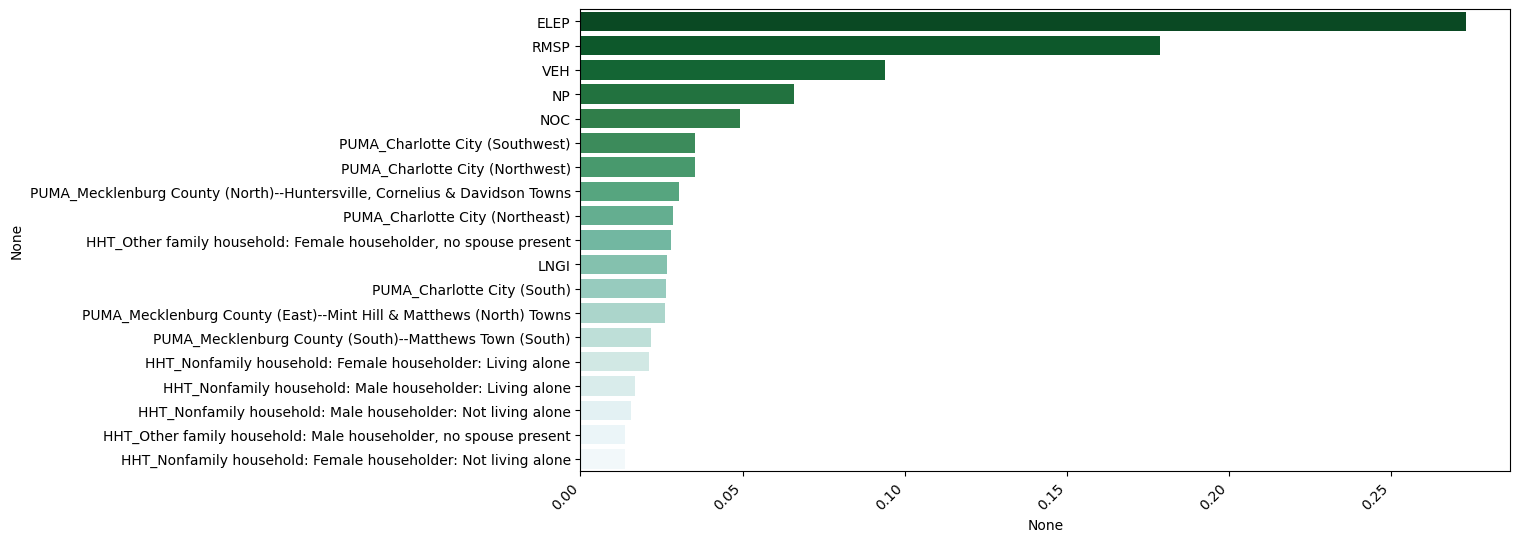

In [61]:
fi_avg=pd.Series(fi_avg,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
chart=sns.barplot(x=fi_avg, y=fi_avg.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi_avg)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

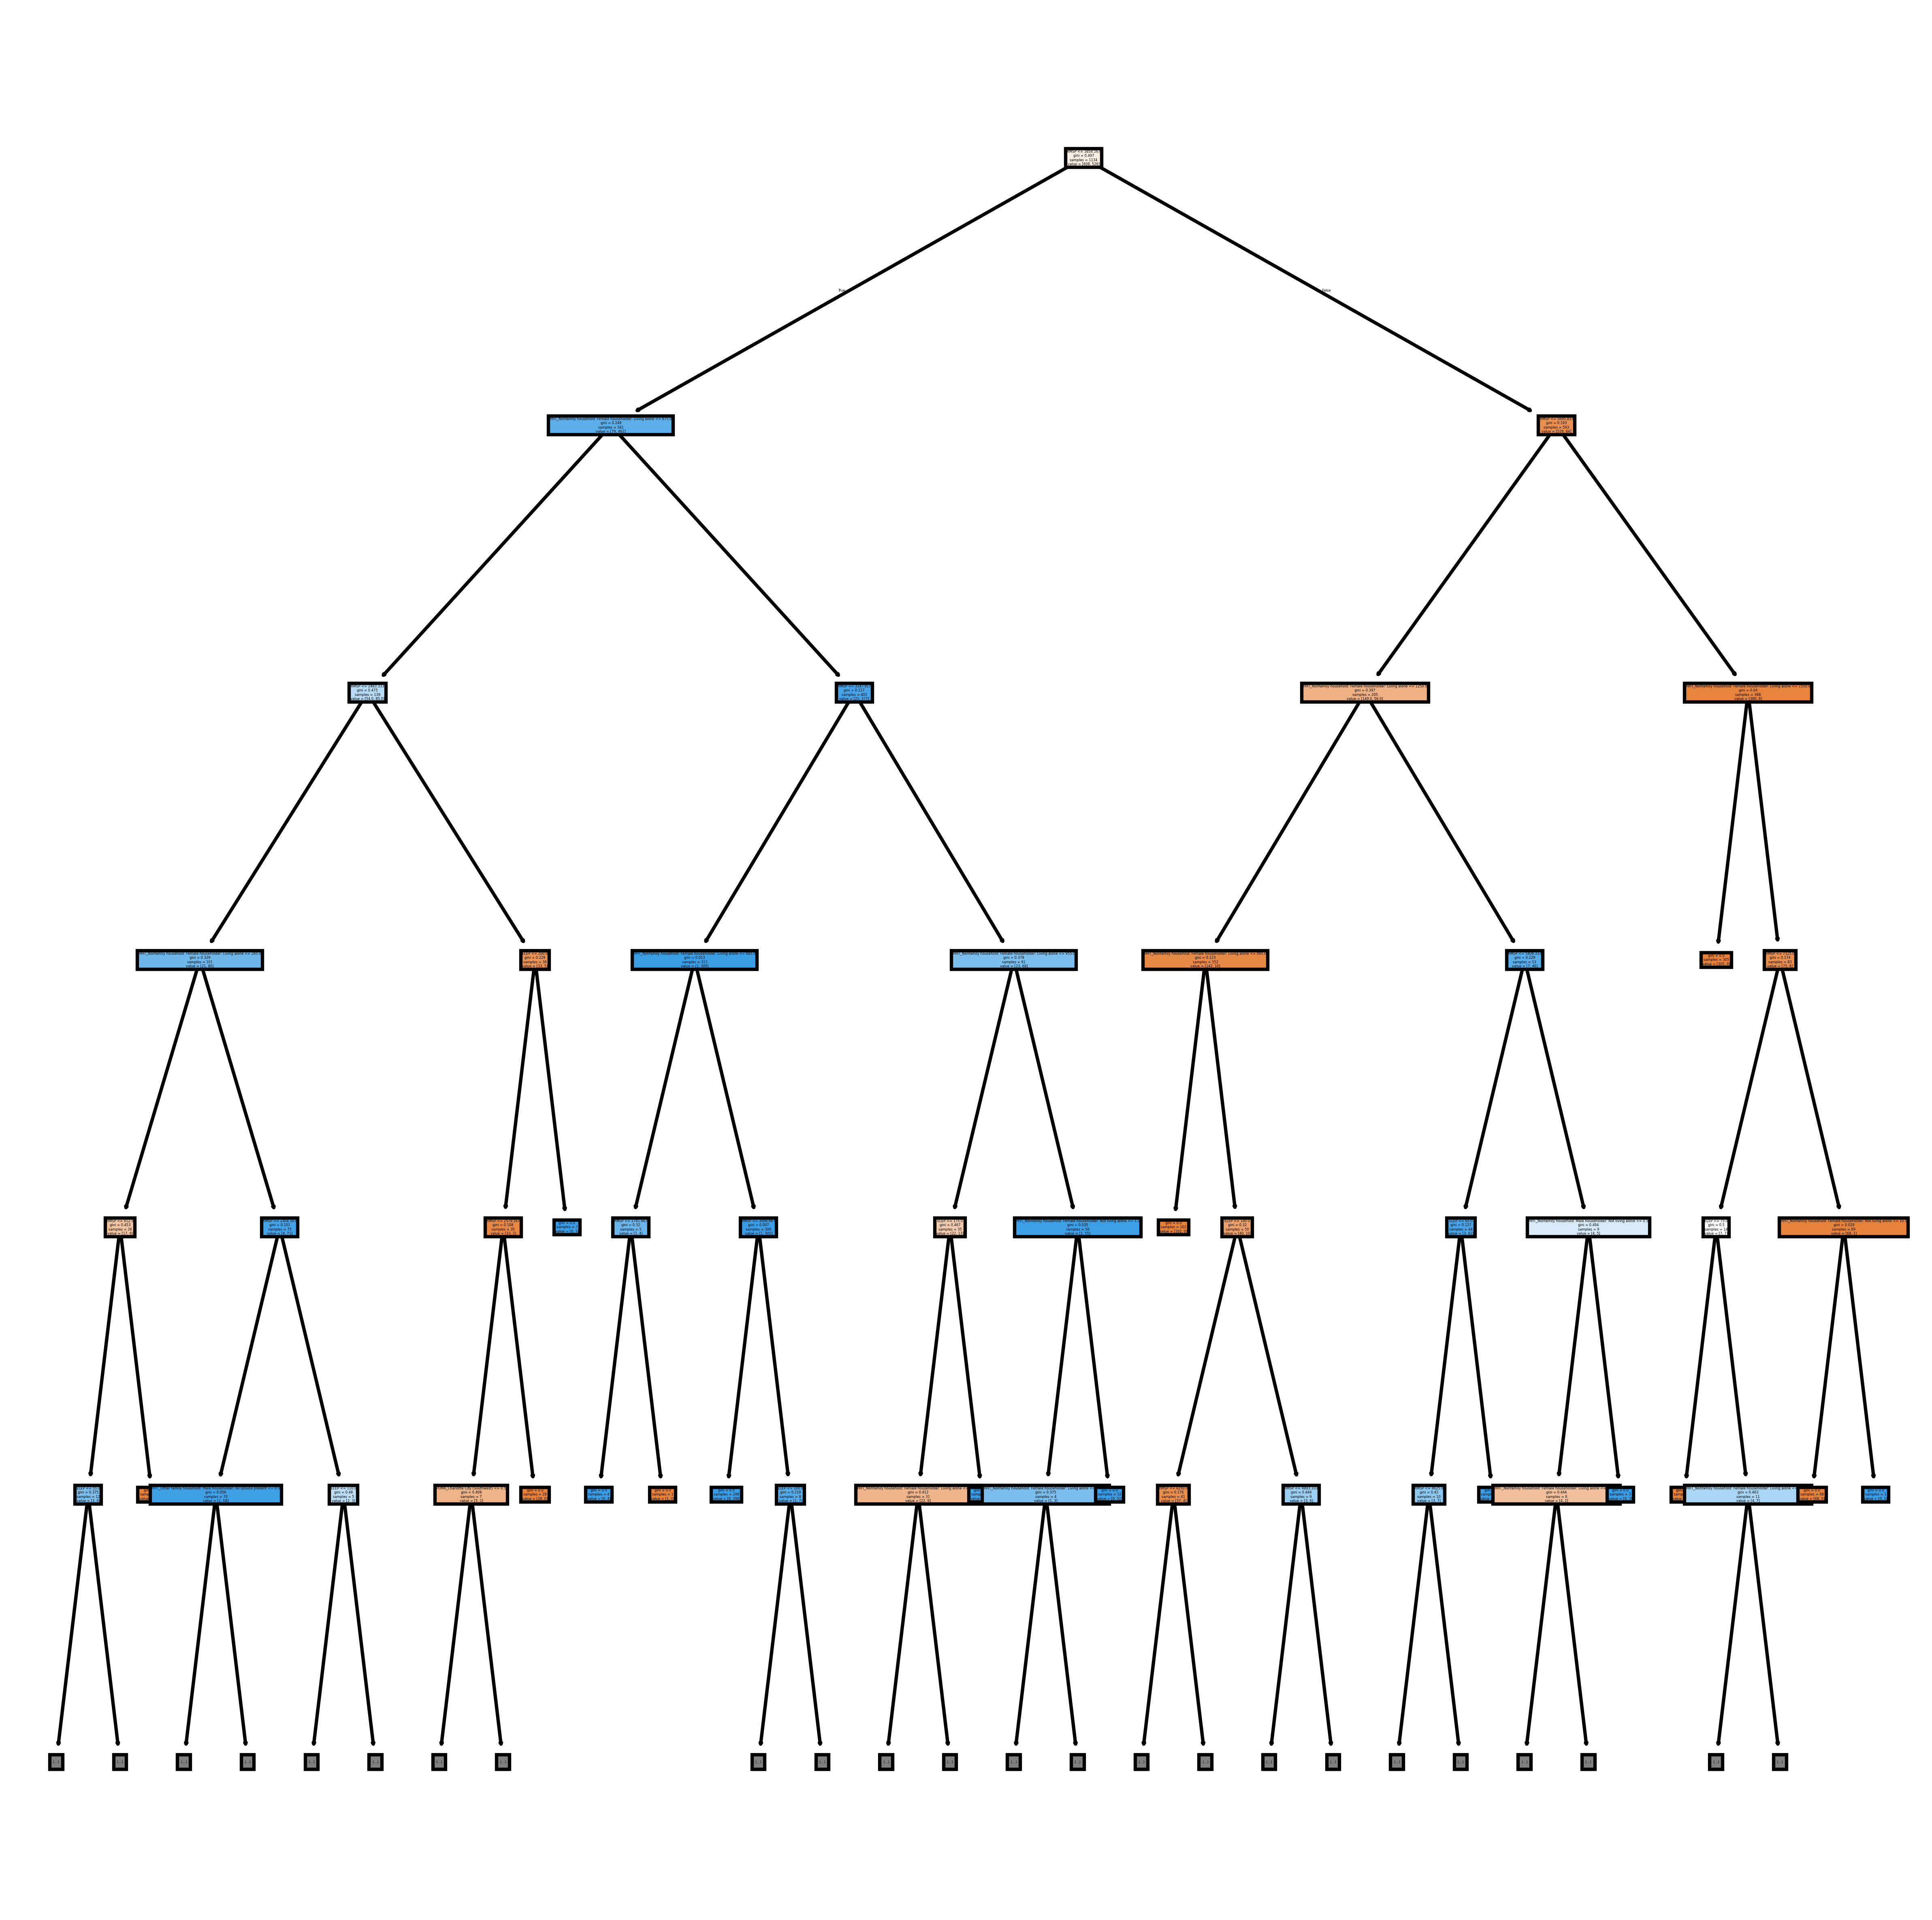

In [63]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=600)
tree.plot_tree(clf,max_depth=5,feature_names=X.columns,filled=True)
plt.show()

In [65]:
predicted=clf2.predict(X_test)
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64       227
         1.0       0.57      0.49      0.53       199

    accuracy                           0.59       426
   macro avg       0.59      0.59      0.58       426
weighted avg       0.59      0.59      0.59       426

